# 🤖 ARQUIVO 4: Modelagem e Análise Preditiva

## 🎯 Objetivo
Aplicar técnicas de machine learning para descobrir relações preditivas e padrões complexos nos dados de repositórios GitHub.   

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv('../dados/github_repos_limpo.csv')
df.head(2)

,name,owner,stars,forks,language,created_at,updated_at,size_kb,open_issues,owner_type,owner_public_repos,subscribers_count,last_year_commits,contributors,closed_issues,pull_requests
0,free-programming-books,EbookFoundation,359735,63576,Python,2013-10-11 06:50:37+00:00,2025-06-21 02:09:07+00:00,19483,45,Organization,37,5000,339,432,129,15
1,public-apis,public-apis,351991,37004,Python,2016-03-20 23:49:42+00:00,2025-06-21 02:06:40+00:00,4771,492,Organization,1,4316,5,427,159,490


## 🔗 Análise de Correlação

### Matriz de Correlação Completa
Investigação das relações lineares entre todas as variáveis numéricas.

**Insights Esperados:**
- Identificação de relações fortes entre métricas
- Descoberta de redundâncias
- Base para seleção de features

**Visualização:**
- Heatmap com escala de cores intuitiva
- Valores de correlação anotados
- Identificação visual de clusters de correlação

In [34]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

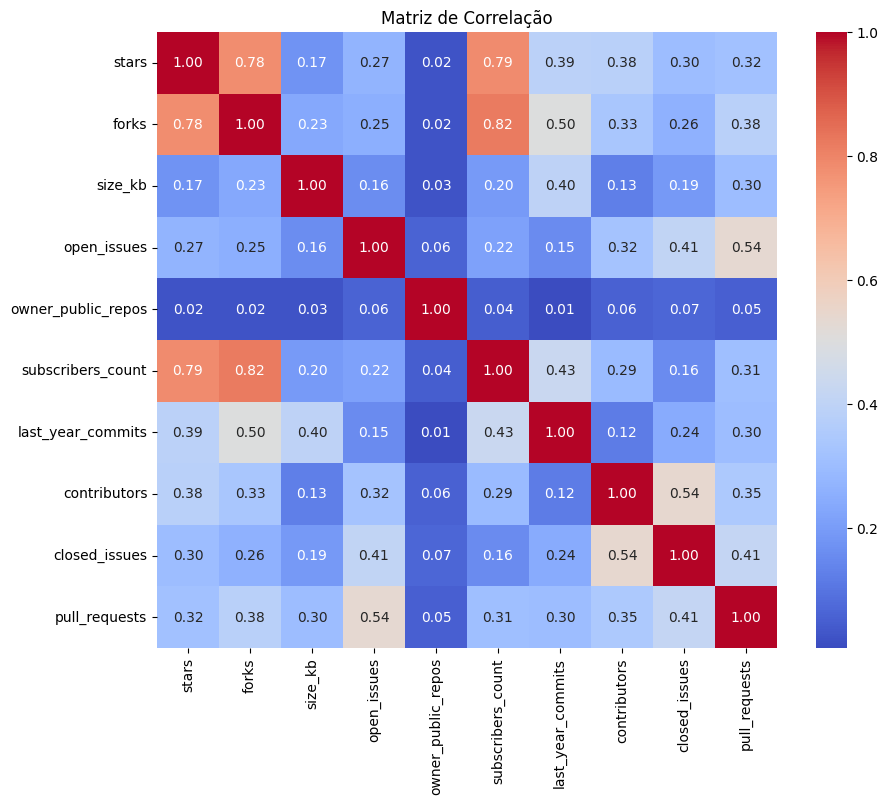

In [35]:
matriz = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## 📈 Modelos de Regressão

### Análise de Relações Bivariadas
Exploração visual de relacionamentos através de scatter plots categorizados.

**Relações Investigadas:**
1. **Stars × Forks:** Correlação entre popularidade e interesse em contribuição
2. **Commits × Forks:** Atividade de desenvolvimento vs. interesse externo
3. **Commits × Tamanho:** Relação entre atividade e complexidade do projeto
4. **Stars × Contributors:** Popularidade vs. diversidade de colaboradores
5. **Contributors × Pull Requests:** Colaboração ativa vs. contribuições externas

### Modelo de Regressão Linear

#### Primeira Abordagem: Dados Originais
**Variáveis:**
- **X:** `subscribers_count` (Inscritos)
- **Y:** `stars` (Popularidade)

**Tratamento de Dados:**
- Filtro para repositórios com ≤20.000 stars (redução de outliers extremos)
- Divisão treino/teste (80/20)

#### Segunda Abordagem: Transformação Logarítmica
**Motivação:** Relações exponenciais são comuns em métricas de popularidade

**Transformações:**
- `log_stars = log1p(stars)`
- `log_subscribers_count = log1p(subscribers_count)`

**Benefícios:**
- ✅ Linearização de relações exponenciais
- ✅ Redução da influência de outliers
- ✅ Melhoria na qualidade do ajuste (R²)

**Métricas de Avaliação:**
- **R² (Coeficiente de Determinação):** Porcentagem da variância explicada
- **Coeficientes:** Interpretação da relação linear

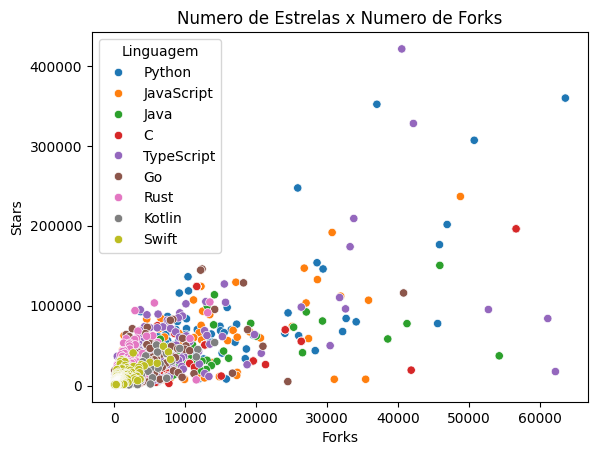

In [36]:
sns.scatterplot(data=df, x="forks", y="stars", hue="language")
plt.title("Numero de Estrelas x Numero de Forks")
plt.xlabel("Forks")
plt.ylabel("Stars")
plt.legend(title="Linguagem")
plt.show()

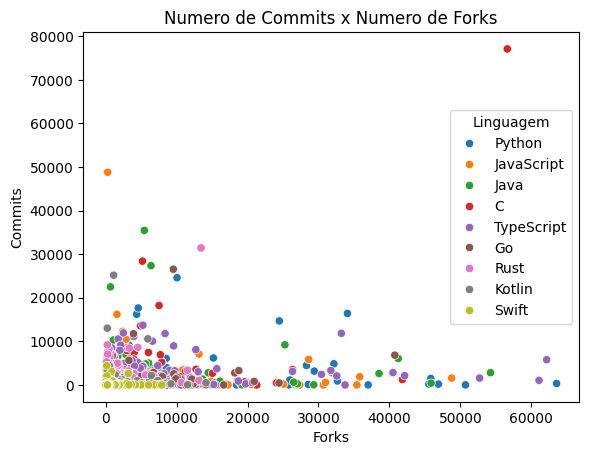

In [37]:
sns.scatterplot(data=df, x="forks", y="last_year_commits", hue="language")
plt.title("Numero de Commits x Numero de Forks")
plt.xlabel("Forks")
plt.ylabel("Commits")
plt.legend(title="Linguagem")
plt.show()

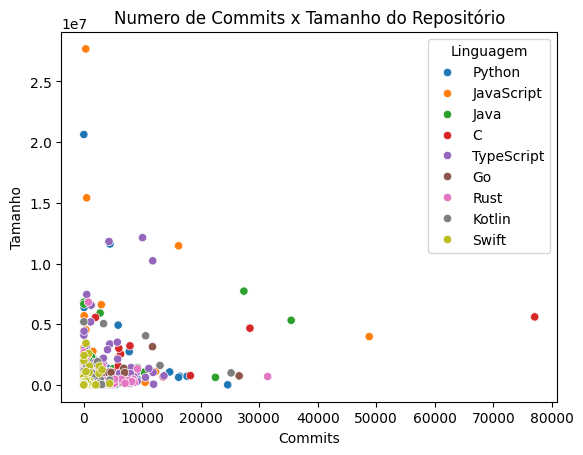

In [38]:
sns.scatterplot(data=df, x="last_year_commits", y="size_kb", hue="language")
plt.title("Numero de Commits x Tamanho do Repositório")
plt.xlabel("Commits")
plt.ylabel("Tamanho")
plt.legend(title="Linguagem")
plt.show()

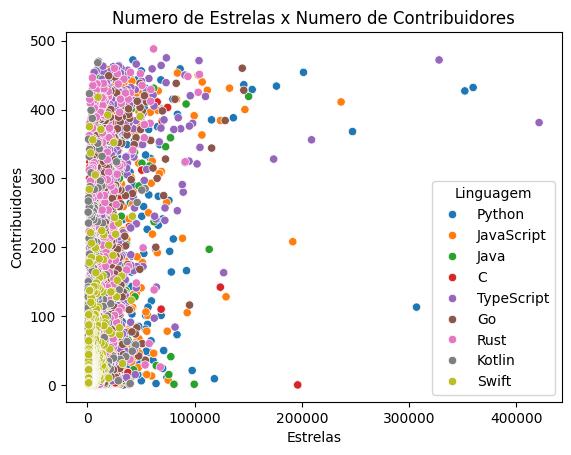

In [39]:
sns.scatterplot(data=df, x="stars", y="contributors", hue="language")
plt.title("Numero de Estrelas x Numero de Contribuidores")
plt.xlabel("Estrelas")
plt.ylabel("Contribuidores")
plt.legend(title="Linguagem")
plt.show()

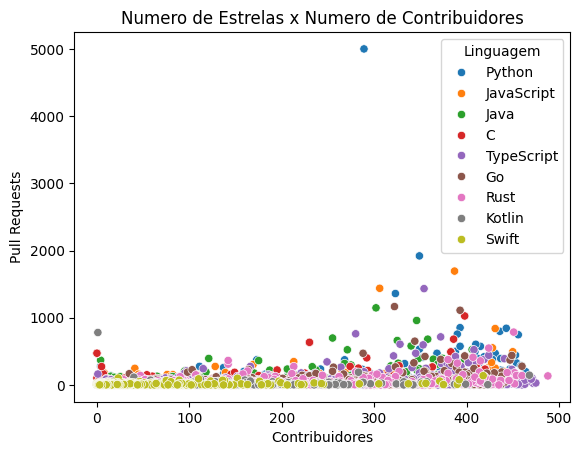

In [40]:
sns.scatterplot(data=df, x="contributors", y="pull_requests", hue="language")
plt.title("Numero de Estrelas x Numero de Contribuidores")
plt.xlabel("Contribuidores")
plt.ylabel("Pull Requests")
plt.legend(title="Linguagem")
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['log_stars'] = np.log1p(df['stars'])
df['log_subscribers_count'] = np.log1p(df['subscribers_count'])

df_so2 = df[(df['stars'] <= 20000)]

df_reg = df_so2[["stars", "subscribers_count", "log_stars","log_subscribers_count", "language"]].dropna()

In [50]:
# variáveis independentes e dependentes
X = df_reg[["subscribers_count"]]
y = df_reg["stars"]

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliação do modelo
r2 = model.score(X_test, y_test)
print(f"Coeficiente de determinação R²: {r2:.2f}")
print(f"Coeficiente angular: {model.coef_[0]:.2f}, Intercepto: {model.intercept_:.2f}")

Coeficiente de determinação R²: 0.23
Coeficiente angular: 12.36, Intercepto: 4929.08


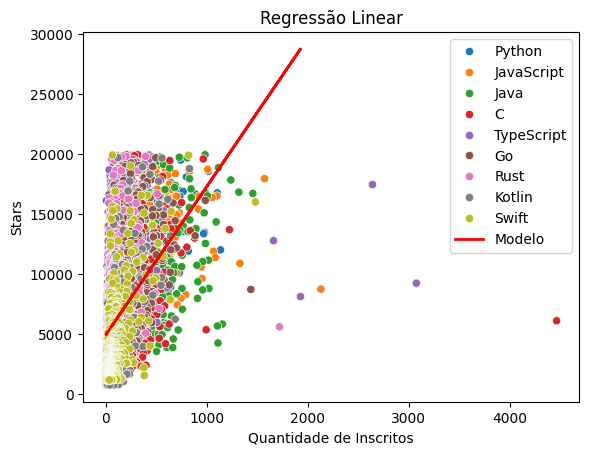

In [51]:
# previsão
y_pred = model.predict(X_test)

# gráfico
sns.scatterplot(data=df_reg, x="subscribers_count", y="stars", hue="language")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Modelo")
plt.xlabel("Quantidade de Inscritos")
plt.ylabel("Stars")
plt.title("Regressão Linear")
plt.legend()
plt.show()

In [52]:
# variáveis independentes e dependentes
X = df_reg[["log_subscribers_count"]]
y = df_reg["log_stars"]

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliação do modelo
r2 = model.score(X_test, y_test)
print(f"Coeficiente de determinação R²: {r2:.2f}")
print(f"Coeficiente angular: {model.coef_[0]:.2f}, Intercepto: {model.intercept_:.2f}")

Coeficiente de determinação R²: 0.41
Coeficiente angular: 0.52, Intercepto: 6.20


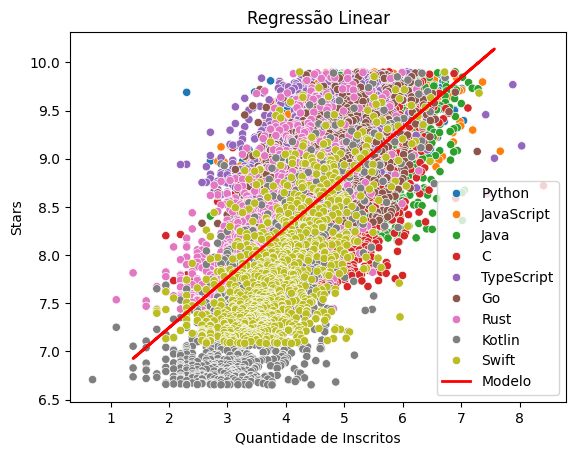

In [53]:
y_pred = model.predict(X_test)

# gráfico
sns.scatterplot(data=df_reg, x="log_subscribers_count", y="log_stars", hue="language")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Modelo")
plt.xlabel("Quantidade de Inscritos")
plt.ylabel("Stars")
plt.title("Regressão Linear")
plt.legend()
plt.show()

## 🎯 Modelos de Classificação

### Classificação por Popularidade

#### Engenharia de Features: Categorização de Popularidade
Criação de classes de popularidade baseadas em distribuição estatística:

**Classes Definidas:**
- **Média:** 770 - 3.000 stars
- **Alta:** 3.001 - 10.000 stars  
- **Muito Alta:** >10.000 stars

**Variáveis Preditoras:**
- `forks`: Interesse em contribuição
- `subscribers_count`: Engajamento ativo
- `last_year_commits`: Atividade recente

#### Modelo: Regressão Logística Multinomial
**Preparação dos Dados:**
- Normalização com StandardScaler
- Divisão treino/teste (75/25)
- Configuração para múltiplas classes

**Avaliação:**
- **Classification Report:** Precision, Recall, F1-score por classe
- **Matriz de Confusão:** Análise visual de erros de classificação

### Classificação por Linguagem de Programação

#### Predição de Tecnologia
Desafio: Prever a linguagem principal baseada em métricas de atividade.

**Hipótese:** Diferentes linguagens apresentam padrões distintos de:
- Número de forks (interesse da comunidade)
- Subscribers (engajamento)
- Commits (intensidade de desenvolvimento)

**Variáveis Preditoras:** Mesmo conjunto da classificação de popularidade
**Modelo:** Regressão Logística Multiclasse

**Complexidade:** Maior número de classes (10 linguagens) torna a classificação mais desafiadora

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

              precision    recall  f1-score   support

        alta       0.64      0.78      0.71       982
       media       0.71      0.80      0.75       542
  muito_alta       0.73      0.28      0.41       447

    accuracy                           0.67      1971
   macro avg       0.69      0.62      0.62      1971
weighted avg       0.68      0.67      0.65      1971



/tmp/ipykernel_30481/2117018212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_so['popularidade'] = pd.cut(df_so['stars'],


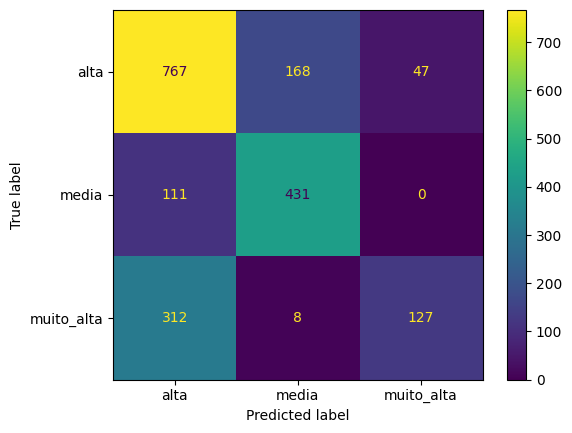

In [54]:

df_so = df[(df['stars'] <= 20000)]

df_so['popularidade'] = pd.cut(df_so['stars'],
                            bins=[770, 3000, 10000, float('inf')],
                            labels=['media', 'alta', 'muito_alta'])

X = df_so[["forks", "subscribers_count", "last_year_commits"]]
y = df_so["popularidade"]

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# treinar o modelo de classificação
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

           C       0.23      0.31      0.26       232
          Go       0.12      0.03      0.05       226
        Java       0.29      0.41      0.34       235
  JavaScript       0.14      0.01      0.02       191
      Kotlin       0.26      0.31      0.28       240
      Python       0.17      0.00      0.01       202
        Rust       0.22      0.13      0.17       235
       Swift       0.28      0.76      0.41       234
  TypeScript       0.21      0.22      0.21       176

    accuracy                           0.25      1971
   macro avg       0.21      0.24      0.19      1971
weighted avg       0.22      0.25      0.20      1971



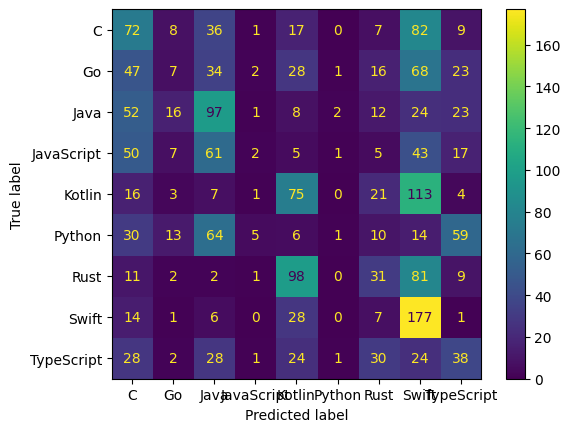

In [256]:
X = df_so[["forks", "subscribers_count", "last_year_commits"]]
y = df_so["language"]

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# treinar o modelo de classificação
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

## 📊 Comparação de Abordagens

### Regressão vs. Classificação

**Regressão Linear:**
- ✅ **Vantagens:** Interpretabilidade direta, previsões contínuas
- ❌ **Limitações:** Assume relações lineares, sensível a outliers

**Classificação:**
- ✅ **Vantagens:** Robusta a outliers, decisões categóricas claras
- ❌ **Limitações:** Perda de informação granular, escolha de limites subjetiva

### Transformações Logarítmicas
**Impacto:** Significativa melhoria no R² ao linearizar relações exponenciais naturais em métricas de popularidade.


## 🔍 Limitações e Considerações

### Limitações dos Modelos:
- **Causalidade:** Correlação não implica causalidade
- **Temporalidade:** Snapshot pontual vs. evolução temporal
- **Viés de Seleção:** Apenas repositórios populares incluídos

### Melhorias Futuras:
- **Modelos Ensemble:** Random Forest, Gradient Boosting
- **Features Temporais:** Tendências de crescimento
- **Cross-validation:** Validação mais robusta
- **Feature Engineering:** Criação de variáveis derivadas